In [1]:
import pandas as pd
import numpy as np
#Libraries for plotting graps, bars and plots
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

# 1.1 LOADING DATA

# 1) Customers

In [2]:
customers1 = pd.read_csv("Production_data_sets/customers.csv", encoding='utf-8', usecols=['_id','active','name','contact_person','adress.country',
                                                              'adress.city','adress.street','adress.zip','email','phone',
                                                              'customer_id','salutation'],
               dtype={"_id": "string","name": "string","contact_person": "string","adress.country": "string",
                      "adress.city": "string","adress.street": "string","adress.zip": "string","email": "string",
                      "phone": "string","customer_id" : "object", "salutation": "string"})
customers1.head()

,_id,active,name,contact_person,adress.country,adress.street,adress.zip,adress.city,email,phone,customer_id,salutation
0,5fb0f83427f5ad000dc779a6,True,Consilium Immobilien GmbH & Co. KG,Herr Miller,Deutschland,Paul-Lincke-Straße 27,88339,Bad Waldsee,service@consilium-immo.de,01702717543,11351,Firma
1,5fb0f90527f5ad000dc779ab,True,Nitech GmbH,<NA>,Deutschland,Raiffeisenstraße 5,77704,Oberkirch,<NA>,<NA>,532541,Firma
2,5fb106c227f5ad000dc779c5,True,ALBA Süd GmbH & Co. KG,<NA>,Deutschland,Franz-Josef-Schweitzer-Platz 1,16727,Velten,<NA>,<NA>,11143,Firma
3,5fb1081a27f5ad000dc779ce,True,Thomas Günter,<NA>,Deutschland,Am Röhrsbächle 10,72270,Baiersbronn,<NA>,<NA>,532542,Herr
4,5fb1098b27f5ad000dc779d2,True,Busam GmbH,<NA>,Deutschland,Müllener Str. 20,77704,Oberkirch,<NA>,<NA>,532543,Firma


In [3]:
customers1.shape

(96670, 12)

In [4]:
customers1 = customers1.rename(columns={'_id':'customers_id','name': 'customer_name','adress.city': 'customer_address_city',
                                        'adress.street':'customer_adress_street',
                                        'adress.zip':'customer_address_zip','adress.country':'customer_address_country' })

In [5]:
customers1.head()

,customers_id,active,customer_name,contact_person,customer_address_country,customer_adress_street,customer_address_zip,customer_address_city,email,phone,customer_id,salutation
0,5fb0f83427f5ad000dc779a6,True,Consilium Immobilien GmbH & Co. KG,Herr Miller,Deutschland,Paul-Lincke-Straße 27,88339,Bad Waldsee,service@consilium-immo.de,01702717543,11351,Firma
1,5fb0f90527f5ad000dc779ab,True,Nitech GmbH,<NA>,Deutschland,Raiffeisenstraße 5,77704,Oberkirch,<NA>,<NA>,532541,Firma
2,5fb106c227f5ad000dc779c5,True,ALBA Süd GmbH & Co. KG,<NA>,Deutschland,Franz-Josef-Schweitzer-Platz 1,16727,Velten,<NA>,<NA>,11143,Firma
3,5fb1081a27f5ad000dc779ce,True,Thomas Günter,<NA>,Deutschland,Am Röhrsbächle 10,72270,Baiersbronn,<NA>,<NA>,532542,Herr
4,5fb1098b27f5ad000dc779d2,True,Busam GmbH,<NA>,Deutschland,Müllener Str. 20,77704,Oberkirch,<NA>,<NA>,532543,Firma


In [6]:
 # checking the number of missing values in all the columns
 customers1.isna().sum()

customers_id                    0
active                          0
customer_name                   1
contact_person              92663
customer_address_country     3777
customer_adress_street       4051
customer_address_zip         3844
customer_address_city        3710
email                       87317
phone                       68938
customer_id                  3265
salutation                  62393
dtype: int64

In [7]:
# counting the unique values for the customers city
print(customers1.customer_address_city.value_counts())

Ratingen              4412
Düsseldorf            4251
Hessisch Oldendorf    2394
Schwedt               2367
Angermünde            2240
                      ... 
Großkorbetha             1
Lany                     1
Zingst                   1
Willich-Anrath           1
Neustadt (Dosse)         1
Name: customer_address_city, Length: 6788, dtype: Int64


In [8]:
print(customers1['customer_address_city'].unique())   #6789 number of cities

<StringArray>
[            'Bad Waldsee',               'Oberkirch',
                  'Velten',             'Baiersbronn',
            'Freudenstadt', 'Bad Peterstal-Griesbach',
                 'Rastatt',    'Edingen-Neckarhausen',
              'Oftersheim',                'Mannheim',
 ...
           'Niedere Börde',               'Pregarten',
                'Siesbach',                'Triftern',
            'Niederfrohna',   'Neustadt / Westerwald',
                'Adlkofen',          'Trochtelfingen',
              'Weitendorf',        'Neustadt (Dosse)']
Length: 6789, dtype: string


In [9]:
customers=customers1[['customers_id','customer_name','customer_address_city','customer_address_zip',
                      'customer_address_country','customer_id']]

In [10]:
customers.head()

,customers_id,customer_name,customer_address_city,customer_address_zip,customer_address_country,customer_id
0,5fb0f83427f5ad000dc779a6,Consilium Immobilien GmbH & Co. KG,Bad Waldsee,88339,Deutschland,11351
1,5fb0f90527f5ad000dc779ab,Nitech GmbH,Oberkirch,77704,Deutschland,532541
2,5fb106c227f5ad000dc779c5,ALBA Süd GmbH & Co. KG,Velten,16727,Deutschland,11143
3,5fb1081a27f5ad000dc779ce,Thomas Günter,Baiersbronn,72270,Deutschland,532542
4,5fb1098b27f5ad000dc779d2,Busam GmbH,Oberkirch,77704,Deutschland,532543


In [11]:
 # checking the number of missing values in all the columns
 customers.isna().sum()

customers_id                   0
customer_name                  1
customer_address_city       3710
customer_address_zip        3844
customer_address_country    3777
customer_id                 3265
dtype: int64

# 2) Containers

In [12]:
containers1= pd.read_csv("Production_data_sets/containers.csv", encoding='utf-8', usecols=['_id','active','name','description','type','volume',
                                                                      'amount','volume.unit', 'weight_in_kg', 'dimensions'],
                 dtype={"_id": "string", "active": "string", "name": "string", "description": "string", 
                        "type": "string","volume": "string","amount": "float","volume.unit": "string","weight_in_kg": "float",
                        "dimensions": "string"})

containers1.head()

,_id,active,name,description,type,volume,volume.unit,amount,dimensions,weight_in_kg
0,5fb0f83427f5ad000dc779a8,TRUE,7 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
1,5fb0f90627f5ad000dc779ad,FALSE,10 cbm Container,<NA>,Absetzcontainer,<NA>,<NA>,NaN,<NA>,NaN
2,5fb106c227f5ad000dc779c7,TRUE,7 cbm Container mit Deckel,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
3,5fb2468ead7077000da5cf3e,TRUE,5 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
4,5fb24e26ad7077000da5cf59,TRUE,5 cbm Container mit Deckel,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN


In [13]:
containers1.shape

(3401, 10)

In [14]:
 # checking the number of missing values in all the columns
 containers1.isna().sum()

_id                0
active             0
name               3
description     2788
type            3372
volume          3375
volume.unit      780
amount           402
dimensions      3392
weight_in_kg    3381
dtype: int64

In [15]:
containers = containers1.rename(columns={'_id':'containers_id','name':'container_name','description':'container_description',
                                         'type':'container_type','volume':'container_volumn','amount':'container_amount',
                                         'volume.unit':'container_volumn_unit', 'weight_in_kg':'container_weight_in_kg',
                                         'dimensions':'container_dimensions'})

In [16]:
containers.head()

,containers_id,active,container_name,container_description,container_type,container_volumn,container_volumn_unit,container_amount,container_dimensions,container_weight_in_kg
0,5fb0f83427f5ad000dc779a8,TRUE,7 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
1,5fb0f90627f5ad000dc779ad,FALSE,10 cbm Container,<NA>,Absetzcontainer,<NA>,<NA>,NaN,<NA>,NaN
2,5fb106c227f5ad000dc779c7,TRUE,7 cbm Container mit Deckel,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
3,5fb2468ead7077000da5cf3e,TRUE,5 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
4,5fb24e26ad7077000da5cf59,TRUE,5 cbm Container mit Deckel,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN


# 3) Orders

In [17]:
orders1= pd.read_csv("Production_data_sets\orders.csv", encoding='utf-8', usecols=['_id', 'client', 'customer', 'waste', 'container', 'recycler', 
                                                              'driver','dispatcher', 'related_order', 'contact_person', 'phone',
                                                              'email', 'description','delivery_date', 'delivery_timestamp', 
                                                              'state', 'direction', 'order_id', 'weight', 'periodic_order',
                                                              'adress.country','adress.zip','adress.city',
                                                              'pickup_address.country',
                                                             'pickup_address.zip','pickup_address.city'], 
                 dtype={"_id": "string", "client": "string", "customer": "string", "waste": "string",  "container": "string",
                        "recycler": "string", "driver": "string","dispatcher": "string", "related_order": "string",  
                        "contact_person": "string", "phone": "string","email": "string","description": "string",
                        "delivery_date": "string","delivery_timestamp": "string","state": "string", "direction": "string", 
                        "order_id": "string","weight": "string","periodic_order": "string",
                        "adress.country":"string","adress.zip":"string","adress.city":"string",
                       "pickup_address.country":"string","pickup_address.zip":"string","pickup_address.city":"string"})

orders1.head()

,_id,client,customer,contact_person,phone,email,description,delivery_date,delivery_timestamp,adress.country,...,direction,order_id,weight,driver,dispatcher,related_order,periodic_order,pickup_address.country,pickup_address.zip,pickup_address.city
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,Herr Holzberger,<NA>,<NA>,Wald bei Allerheiligen,2020-11-20T08:37:23.514Z,<NA>,Deutschland,...,Abziehen,1,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,<NA>,<NA>,<NA>,<NA>
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,Herr Holzberger,<NA>,<NA>,Wald,2020-11-20T08:43:34.536Z,<NA>,Deutschland,...,Stellen,2,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,<NA>,<NA>,<NA>,<NA>
2,5fb78274139cff000dc31c6a,5fb63df9fcb63f000d4bbe69,5fb78273139cff000dc31c67,Jörg Günter,07447383,<NA>,Lager,2020-11-20T08:45:05.389Z,2020-11-20T15:27:27.019Z,Deutschland,...,Leeren,4,"0,49",5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78274139cff000dc31c6a,<NA>,<NA>,<NA>,<NA>
3,5fb78317139cff000dc31c6e,5fb63df9fcb63f000d4bbe69,5fb78317139cff000dc31c6c,<NA>,<NA>,<NA>,<NA>,2020-11-20T08:46:49.567Z,<NA>,Deutschland,...,Stellen,5,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78317139cff000dc31c6e,<NA>,<NA>,<NA>,<NA>
4,5fb7834b139cff000dc31c72,5fb63df9fcb63f000d4bbe69,5fb7834a139cff000dc31c70,<NA>,<NA>,<NA>,Parkplatz,2020-11-20T08:49:35.014Z,<NA>,Deutschland,...,Leeren,6,"1,67",5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb7834b139cff000dc31c72,<NA>,<NA>,<NA>,<NA>


In [18]:
orders1.shape

(202392, 26)

In [19]:
 # checking the number of missing values in all the columns
 orders1.isna().sum()

_id                            0
client                         2
customer                       0
contact_person            194520
phone                     103256
email                     139376
description               118775
delivery_date                  0
delivery_timestamp         35417
adress.country              3923
adress.zip                  8526
adress.city                 3934
waste                      21468
container                  10555
recycler                   96926
state                          0
direction                      0
order_id                     547
weight                    119961
driver                     13755
dispatcher                    32
related_order              33047
periodic_order            199558
pickup_address.country    196121
pickup_address.zip        196815
pickup_address.city       196121
dtype: int64

In [20]:
orders1 = orders1.rename(columns={'state':'order_state','direction':'order_direction','weight':'order_weight',
                                 'adress.country':'order_address_country','adress.zip':'order_address_zip',
                                  'adress.city':'order_address_city',
                                 'pickup_address.country':'pickup_address_country','pickup_address.zip':'pickup_address_zip',
                                  'pickup_address.city':'pickup_address_city'})

In [21]:
orders1.head()

,_id,client,customer,contact_person,phone,email,description,delivery_date,delivery_timestamp,order_address_country,...,order_direction,order_id,order_weight,driver,dispatcher,related_order,periodic_order,pickup_address_country,pickup_address_zip,pickup_address_city
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,Herr Holzberger,<NA>,<NA>,Wald bei Allerheiligen,2020-11-20T08:37:23.514Z,<NA>,Deutschland,...,Abziehen,1,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,<NA>,<NA>,<NA>,<NA>
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,Herr Holzberger,<NA>,<NA>,Wald,2020-11-20T08:43:34.536Z,<NA>,Deutschland,...,Stellen,2,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,<NA>,<NA>,<NA>,<NA>
2,5fb78274139cff000dc31c6a,5fb63df9fcb63f000d4bbe69,5fb78273139cff000dc31c67,Jörg Günter,07447383,<NA>,Lager,2020-11-20T08:45:05.389Z,2020-11-20T15:27:27.019Z,Deutschland,...,Leeren,4,"0,49",5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78274139cff000dc31c6a,<NA>,<NA>,<NA>,<NA>
3,5fb78317139cff000dc31c6e,5fb63df9fcb63f000d4bbe69,5fb78317139cff000dc31c6c,<NA>,<NA>,<NA>,<NA>,2020-11-20T08:46:49.567Z,<NA>,Deutschland,...,Stellen,5,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78317139cff000dc31c6e,<NA>,<NA>,<NA>,<NA>
4,5fb7834b139cff000dc31c72,5fb63df9fcb63f000d4bbe69,5fb7834a139cff000dc31c70,<NA>,<NA>,<NA>,Parkplatz,2020-11-20T08:49:35.014Z,<NA>,Deutschland,...,Leeren,6,"1,67",5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb7834b139cff000dc31c72,<NA>,<NA>,<NA>,<NA>


In [22]:
orders=orders1[['_id', 'client', 'customer', 'waste', 'container', 'recycler', 
                'driver','dispatcher', 'related_order', 'delivery_date', 'delivery_timestamp', 
                'order_state', 'order_direction', 'order_weight', 'periodic_order','order_address_country',
                'order_address_zip','order_address_city','pickup_address_country','pickup_address_zip','pickup_address_city']]

In [23]:
orders.head()

,_id,client,customer,waste,container,recycler,driver,dispatcher,related_order,delivery_date,...,order_state,order_direction,order_weight,periodic_order,order_address_country,order_address_zip,order_address_city,pickup_address_country,pickup_address_zip,pickup_address_city
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb78181139cff000dc31c5e,5fb78181139cff000dc31c5f,5fb24a3ead7077000da5cf4a,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,2020-11-20T08:37:23.514Z,...,Abgeschlossen,Abziehen,<NA>,<NA>,Deutschland,77740,Bad Peterstal-Griesbach,<NA>,<NA>,<NA>
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-11-20T08:43:34.536Z,...,Abgeschlossen,Stellen,<NA>,<NA>,Deutschland,77740,Bad Peterstal-Griesbach,<NA>,<NA>,<NA>
2,5fb78274139cff000dc31c6a,5fb63df9fcb63f000d4bbe69,5fb78273139cff000dc31c67,5fb78273139cff000dc31c68,5fbcd0027217b5000db2dec5,5fb249edad7077000da5cf48,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78274139cff000dc31c6a,2020-11-20T08:45:05.389Z,...,Abgeschlossen,Leeren,"0,49",<NA>,Deutschland,72270,Baiersbronn,<NA>,<NA>,<NA>
3,5fb78317139cff000dc31c6e,5fb63df9fcb63f000d4bbe69,5fb78317139cff000dc31c6c,5fb78317139cff000dc31c6d,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78317139cff000dc31c6e,2020-11-20T08:46:49.567Z,...,Abgeschlossen,Stellen,<NA>,<NA>,Deutschland,72270,Baiersbronn,<NA>,<NA>,<NA>
4,5fb7834b139cff000dc31c72,5fb63df9fcb63f000d4bbe69,5fb7834a139cff000dc31c70,5fb78273139cff000dc31c68,5fb7834b139cff000dc31c71,5fb249edad7077000da5cf48,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb7834b139cff000dc31c72,2020-11-20T08:49:35.014Z,...,Abgeschlossen,Leeren,"1,67",<NA>,Deutschland,72270,Baiersbronn,<NA>,<NA>,<NA>


# 4) Wastes

In [24]:
wastes1 = pd.read_csv("Production_data_sets/wastes.csv", encoding='utf-8', usecols=['_id','active','name','avv',
                                                              'description','prices[0].price','prices[0].unit.unit'],
               dtype={"_id": "string","active": "boolean","name": "string","avv": "string","description": "string",
                      "prices[0].price": "string","prices[0].unit.unit":"string"})
wastes1.head()

,_id,active,name,avv,description,prices[0].price,prices[0].unit.unit
0,5fb0f83427f5ad000dc779a7,True,Holz,15 01 03,<NA>,200,t
1,5fb0f90527f5ad000dc779ac,True,Schrott,<NA>,<NA>,<NA>,<NA>
2,5fb106c227f5ad000dc779c6,True,Abfall zur Verwertung,15 01 06,<NA>,280,t
3,5fb1081a27f5ad000dc779cf,True,"Bauschutt, nicht verwertbar",17 01 07,<NA>,120,t
4,5fb2301fa78c45000d432959,True,Bauschutt,17 09 04,<NA>,30,cbm


In [25]:
wastes1.shape

(6897, 7)

In [26]:
 # checking the number of missing values in all the columns
 wastes1.isna().sum()

_id                       0
active                    0
name                      1
avv                    4984
description            5877
prices[0].price        5982
prices[0].unit.unit    6031
dtype: int64

In [27]:
wastes1 = wastes1.rename(columns={'_id':'wastes_id','name':'material_name','avv':'material_avv','description':'material_description'})

In [28]:
wastes=wastes1[['wastes_id','material_name','material_avv','material_description']]

In [29]:
wastes.head()

,wastes_id,material_name,material_avv,material_description
0,5fb0f83427f5ad000dc779a7,Holz,15 01 03,<NA>
1,5fb0f90527f5ad000dc779ac,Schrott,<NA>,<NA>
2,5fb106c227f5ad000dc779c6,Abfall zur Verwertung,15 01 06,<NA>
3,5fb1081a27f5ad000dc779cf,"Bauschutt, nicht verwertbar",17 01 07,<NA>
4,5fb2301fa78c45000d432959,Bauschutt,17 09 04,<NA>


# 5) Recyclers

In [30]:
recyclers1 = pd.read_csv("Production_data_sets/recyclers.csv", encoding='utf-8', usecols=['_id','active','name','adress.country','adress.city'
                                                                     ,'adress.zip','adress.street',
                                                              'description','isOwn'],
               dtype={"_id": "string","active": "boolean","name": "string","adress.country": "string","adress.city": "string",
                      "adress.zip": "string","adress.street": "string",
                      "description": "string","isOwn":"boolean"})
recyclers1.head()

,_id,active,name,adress.country,adress.street,adress.zip,adress.city,description,isOwn
0,5fb2493fad7077000da5cf45,True,Deponie Bengelbruck,Deutschland,B294,<NA>,Freudenstadt,<NA>,<NA>
1,5fb249edad7077000da5cf48,True,Deponie Gaiser,Deutschland,Ruhesteinstraße 131,72270,Baiersbronn,<NA>,True
2,5fb24a3ead7077000da5cf4a,True,ALBA Süd GmbH & Co. KG,Deutschland,<NA>,72160,Horb am Neckar,<NA>,False
3,5fb24b4cad7077000da5cf4f,True,Klumpp Rohstoffe Freudenstadt,Deutschland,Alte Poststraße 35,72250,Freudenstadt,<NA>,False
4,5f65b6be2569f4000d3cbce0,True,Erdenwerk Mannheim,Deutschland,Kirschgartshäuser Straße,68307,Mannheim,<NA>,<NA>


In [31]:
 # checking the number of missing values in all the columns
 recyclers1.isna().sum()

_id                  0
active               0
name                 0
adress.country     719
adress.street      763
adress.zip         780
adress.city        715
description       1583
isOwn               74
dtype: int64

In [32]:
recyclers1 = recyclers1.rename(columns={'_id':'recyclers_id','adress.country':'recyclers_address_country','adress.zip':'recyclers_address_zip',
                                        'adress.city':'recyclers_address_city'})

In [33]:
 # checking the number of missing values in all the columns
 recyclers1.isna().sum()

recyclers_id                    0
active                          0
name                            0
recyclers_address_country     719
adress.street                 763
recyclers_address_zip         780
recyclers_address_city        715
description                  1583
isOwn                          74
dtype: int64

In [34]:
recyclers1.shape

(1853, 9)

# Client

In [35]:
clients1 = pd.read_csv("Production_data_sets/clients.csv", encoding='utf-8', usecols=['_id','name','adress.country',
                                                              'adress.city','adress.street','adress.zip'],
               dtype={"_id": "string","name": "string","adress.country": "string",
                      "adress.city": "string","adress.street": "string","adress.zip": "string"})
clients1.head()

,_id,name,adress.country,adress.street,adress.zip,adress.city
0,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
1,5fc63d7712653b000d3c8183,Kuebeldienst Emrich GmbH & Co.KG,<NA>,<NA>,<NA>,<NA>
2,5fc93210221a7b000d5c1687,Mehring GmbH,Deutschland,Industriestraße 18,97904,Dorfprozelten
3,5ff0dc024a2b82000dd667cb,Rauser Baustoff & Recycling GmbH,Deutschland,Lange Straße 83,72285,Pfalzgrafenweiler
4,602a92ab6aaa23000d37d42c,<NA>,Deutschland,Doppheide 90,49084,Osnabrück


In [36]:
clients1 = clients1.rename(columns={'_id':'clients_id','name':'client_name','adress.country':'clients_address_country',
                                        'adress.zip':'clients_address_zip',
                                        'adress.city':'clients_address_city'})

In [37]:
 # checking the number of missing values in all the columns
 clients1.isna().sum()

clients_id                  0
client_name                 2
clients_address_country    97
adress.street              97
clients_address_zip        98
clients_address_city       97
dtype: int64

In [38]:
clients=clients1[['clients_id','client_name']]

# 1.2 MERGING DATAFRAMES

In [39]:
orders.shape

(202392, 21)

In [40]:
customers.shape

(96670, 6)

# orders and customers

In [41]:
df = pd.merge(orders, customers, left_on='customer', right_on='customers_id', how='inner')


In [42]:
df.shape

(202273, 27)

In [43]:
df.head()

,_id,client,customer,waste,container,recycler,driver,dispatcher,related_order,delivery_date,...,order_address_city,pickup_address_country,pickup_address_zip,pickup_address_city,customers_id,customer_name,customer_address_city,customer_address_zip,customer_address_country,customer_id
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb78181139cff000dc31c5e,5fb78181139cff000dc31c5f,5fb24a3ead7077000da5cf4a,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,2020-11-20T08:37:23.514Z,...,Bad Peterstal-Griesbach,<NA>,<NA>,<NA>,5fb78180139cff000dc31c5d,Nationalpark Schwarzwald -Winterdienstgehöft,Bad Peterstal-Griesbach,77740,Deutschland,NaN
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-11-20T08:43:34.536Z,...,Bad Peterstal-Griesbach,<NA>,<NA>,<NA>,5fb78180139cff000dc31c5d,Nationalpark Schwarzwald -Winterdienstgehöft,Bad Peterstal-Griesbach,77740,Deutschland,NaN
2,5fc75c6f4df7ba000d361dde,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-12-02T22:59:59.000Z,...,Bad Peterstal-Griesbach,<NA>,<NA>,<NA>,5fb78180139cff000dc31c5d,Nationalpark Schwarzwald -Winterdienstgehöft,Bad Peterstal-Griesbach,77740,Deutschland,NaN
3,5fc75c754df7ba000d361de0,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78207139cff000dc31c65,2020-12-02T22:59:59.000Z,...,Bad Peterstal-Griesbach,<NA>,<NA>,<NA>,5fb78180139cff000dc31c5d,Nationalpark Schwarzwald -Winterdienstgehöft,Bad Peterstal-Griesbach,77740,Deutschland,NaN
4,5fc75c7b4df7ba000d361de2,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb81c0d169ee5000ddf0c13,2020-12-02T22:59:59.000Z,...,Bad Peterstal-Griesbach,<NA>,<NA>,<NA>,5fb78180139cff000dc31c5d,Nationalpark Schwarzwald -Winterdienstgehöft,Bad Peterstal-Griesbach,77740,Deutschland,NaN


In [44]:
containers.shape

(3401, 10)


# orders and containers

In [45]:
df = pd.merge(df, containers, left_on='container', right_on='containers_id', how='inner')


In [46]:
df.shape

(191719, 37)

In [47]:
df.head()

,_id,client,customer,waste,container,recycler,driver,dispatcher,related_order,delivery_date,...,containers_id,active,container_name,container_description,container_type,container_volumn,container_volumn_unit,container_amount,container_dimensions,container_weight_in_kg
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb78181139cff000dc31c5e,5fb78181139cff000dc31c5f,5fb24a3ead7077000da5cf4a,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,2020-11-20T08:37:23.514Z,...,5fb78181139cff000dc31c5f,TRUE,10 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-11-20T08:43:34.536Z,...,5fb78181139cff000dc31c5f,TRUE,10 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
2,5fc75c6f4df7ba000d361dde,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-12-02T22:59:59.000Z,...,5fb78181139cff000dc31c5f,TRUE,10 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
3,5fc75c754df7ba000d361de0,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78207139cff000dc31c65,2020-12-02T22:59:59.000Z,...,5fb78181139cff000dc31c5f,TRUE,10 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
4,5fc75c7b4df7ba000d361de2,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb81c0d169ee5000ddf0c13,2020-12-02T22:59:59.000Z,...,5fb78181139cff000dc31c5f,TRUE,10 cbm Container,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN


# orders and wastes

In [48]:
wastes.shape

(6897, 4)

In [49]:
df = pd.merge(df, wastes, left_on='waste', right_on='wastes_id', how='inner')

In [50]:
df.shape

(171981, 41)

In [51]:
df.head()

,_id,client,customer,waste,container,recycler,driver,dispatcher,related_order,delivery_date,...,container_type,container_volumn,container_volumn_unit,container_amount,container_dimensions,container_weight_in_kg,wastes_id,material_name,material_avv,material_description
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb78181139cff000dc31c5e,5fb78181139cff000dc31c5f,5fb24a3ead7077000da5cf4a,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,2020-11-20T08:37:23.514Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb78181139cff000dc31c5e,Holz,<NA>,<NA>
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-11-20T08:43:34.536Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
2,5fc75c6f4df7ba000d361dde,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
3,5fc75c754df7ba000d361de0,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78207139cff000dc31c65,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
4,5fc75c7b4df7ba000d361de2,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb81c0d169ee5000ddf0c13,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>


# orders and recyclers

In [52]:
recyclers1.shape

(1853, 9)

In [53]:
df.head()

,_id,client,customer,waste,container,recycler,driver,dispatcher,related_order,delivery_date,...,container_type,container_volumn,container_volumn_unit,container_amount,container_dimensions,container_weight_in_kg,wastes_id,material_name,material_avv,material_description
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb78181139cff000dc31c5e,5fb78181139cff000dc31c5f,5fb24a3ead7077000da5cf4a,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,2020-11-20T08:37:23.514Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb78181139cff000dc31c5e,Holz,<NA>,<NA>
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-11-20T08:43:34.536Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
2,5fc75c6f4df7ba000d361dde,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
3,5fc75c754df7ba000d361de0,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78207139cff000dc31c65,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
4,5fc75c7b4df7ba000d361de2,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb81c0d169ee5000ddf0c13,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>


In [54]:
recyclers1.head()

,recyclers_id,active,name,recyclers_address_country,adress.street,recyclers_address_zip,recyclers_address_city,description,isOwn
0,5fb2493fad7077000da5cf45,True,Deponie Bengelbruck,Deutschland,B294,<NA>,Freudenstadt,<NA>,<NA>
1,5fb249edad7077000da5cf48,True,Deponie Gaiser,Deutschland,Ruhesteinstraße 131,72270,Baiersbronn,<NA>,True
2,5fb24a3ead7077000da5cf4a,True,ALBA Süd GmbH & Co. KG,Deutschland,<NA>,72160,Horb am Neckar,<NA>,False
3,5fb24b4cad7077000da5cf4f,True,Klumpp Rohstoffe Freudenstadt,Deutschland,Alte Poststraße 35,72250,Freudenstadt,<NA>,False
4,5f65b6be2569f4000d3cbce0,True,Erdenwerk Mannheim,Deutschland,Kirschgartshäuser Straße,68307,Mannheim,<NA>,<NA>


In [55]:
#df = pd.merge(df, recyclers1, left_on='recycler', right_on='recyclers_id', how='inner')

In [56]:
df.shape

(171981, 41)

In [57]:
df.head()

,_id,client,customer,waste,container,recycler,driver,dispatcher,related_order,delivery_date,...,container_type,container_volumn,container_volumn_unit,container_amount,container_dimensions,container_weight_in_kg,wastes_id,material_name,material_avv,material_description
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb78181139cff000dc31c5e,5fb78181139cff000dc31c5f,5fb24a3ead7077000da5cf4a,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,2020-11-20T08:37:23.514Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb78181139cff000dc31c5e,Holz,<NA>,<NA>
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-11-20T08:43:34.536Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
2,5fc75c6f4df7ba000d361dde,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
3,5fc75c754df7ba000d361de0,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78207139cff000dc31c65,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>
4,5fc75c7b4df7ba000d361de2,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb81c0d169ee5000ddf0c13,2020-12-02T22:59:59.000Z,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>


# orders and clients

In [58]:
clients.shape

(194, 2)

In [59]:
df.shape

(171981, 41)

In [60]:
df = pd.merge(df, clients1, left_on='client', right_on='clients_id', how='inner')

In [61]:
df.shape

(171980, 47)

# 2) DATA PREPARATION

In [62]:
df.head(10)

,_id,client,customer,waste,container,recycler,driver,dispatcher,related_order,delivery_date,...,wastes_id,material_name,material_avv,material_description,clients_id,client_name,clients_address_country,adress.street,clients_address_zip,clients_address_city
0,5fb78181139cff000dc31c60,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb78181139cff000dc31c5e,5fb78181139cff000dc31c5f,5fb24a3ead7077000da5cf4a,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78181139cff000dc31c60,2020-11-20T08:37:23.514Z,...,5fb78181139cff000dc31c5e,Holz,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
1,5fb781fb139cff000dc31c63,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-11-20T08:43:34.536Z,...,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
2,5fc75c6f4df7ba000d361dde,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb781fb139cff000dc31c63,2020-12-02T22:59:59.000Z,...,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
3,5fc75c754df7ba000d361de0,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78207139cff000dc31c65,2020-12-02T22:59:59.000Z,...,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
4,5fc75c7b4df7ba000d361de2,5fb63df9fcb63f000d4bbe69,5fb78180139cff000dc31c5d,5fb781fb139cff000dc31c62,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb81c0d169ee5000ddf0c13,2020-12-02T22:59:59.000Z,...,5fb781fb139cff000dc31c62,unbekannt,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
5,5fb78317139cff000dc31c6e,5fb63df9fcb63f000d4bbe69,5fb78317139cff000dc31c6c,5fb78317139cff000dc31c6d,5fb78181139cff000dc31c5f,<NA>,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78317139cff000dc31c6e,2020-11-20T08:46:49.567Z,...,5fb78317139cff000dc31c6d,Gartenabfall,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
6,5fb784f7139cff000dc31c75,5fb63df9fcb63f000d4bbe69,5fb78317139cff000dc31c6c,5fb78317139cff000dc31c6d,5fb78181139cff000dc31c5f,5fb2493fad7077000da5cf45,5fb78880d1d5c2006a62bf39,5fb63df444894a00680325de,5fb784f7139cff000dc31c75,2020-11-22T23:00:00.000Z,...,5fb78317139cff000dc31c6d,Gartenabfall,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
7,5fbce93c267fe1000dfbca42,5fb63df9fcb63f000d4bbe69,5fb78317139cff000dc31c6c,5fb78317139cff000dc31c6d,5fb78181139cff000dc31c5f,5fb2493fad7077000da5cf45,5fb78880d1d5c2006a62bf39,5fb63df444894a00680325de,5fb78317139cff000dc31c6e,2020-11-22T23:00:00.000Z,...,5fb78317139cff000dc31c6d,Gartenabfall,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
8,5fb78274139cff000dc31c6a,5fb63df9fcb63f000d4bbe69,5fb78273139cff000dc31c67,5fb78273139cff000dc31c68,5fbcd0027217b5000db2dec5,5fb249edad7077000da5cf48,5fb783afd1d5c2006a62bc5a,5fb63df444894a00680325de,5fb78274139cff000dc31c6a,2020-11-20T08:45:05.389Z,...,5fb78273139cff000dc31c68,Abfall zur Verwertung,<NA>,<NA>,5fb63df9fcb63f000d4bbe69,Helmut Gaiser GmbH,Deutschland,Wilhelm-Münster-Straße 28,72270,Baiersbronn
9,6048852e7a6517000d737be3,5fb63df9fcb63f000d4bbe69,5fb78273139cff000dc31c67,5fb78273139cff000dc31c68,5fbcd0027217b5000db2dec5,5fb24a3ead7077000da5cf4a,5fb78880d1d5c2006a62bf39,5fe30d7615ae2b00691d68bf,5fb78274139cff000

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171980 entries, 0 to 171979
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   _id                       171980 non-null  string 
 1   client                    171980 non-null  string 
 2   customer                  171980 non-null  string 
 3   waste                     171980 non-null  string 
 4   container                 171980 non-null  string 
 5   recycler                  97521 non-null   string 
 6   driver                    163514 non-null  string 
 7   dispatcher                171979 non-null  string 
 8   related_order             151171 non-null  string 
 9   delivery_date             171980 non-null  string 
 10  delivery_timestamp        145331 non-null  string 
 11  order_state               171980 non-null  string 
 12  order_direction           171980 non-null  string 
 13  order_weight              73601 non-null   s

In [64]:
 # checking the number of missing values in all the columns
 df.isna().sum()

_id                              0
client                           0
customer                         0
waste                            0
container                        0
recycler                     74459
driver                        8466
dispatcher                       1
related_order                20809
delivery_date                    0
delivery_timestamp           26649
order_state                      0
order_direction                  0
order_weight                 98379
periodic_order              169516
order_address_country         2159
order_address_zip             5654
order_address_city            2157
pickup_address_country      167571
pickup_address_zip          168081
pickup_address_city         167570
customers_id                     0
customer_name                    0
customer_address_city         8538
customer_address_zip          9020
customer_address_country     10351
customer_id                   5745
containers_id                    0
active              

In [65]:
# counting the unique values for the vehicle type
print(df.order_state.value_counts())

Abgeschlossen      161981
Rechnungswesen       4359
Rückmeldung          2490
Annahme              1719
Disposition          1086
Nachbearbeitung       218
Lieferung             114
Eingang                12
Befundung               1
Name: order_state, dtype: Int64


In [66]:
# counting the unique values for the vehicle type
print(df.order_direction.value_counts())

Abziehen             51730
Stellen              44555
Tauschen             32516
Leeren               22500
Materiallieferung     6862
Sofortbeladung        5792
Transport             3845
Abgang                2255
Sonstiges             1919
Anlieferung              4
Abholung                 2
Name: order_direction, dtype: Int64


In [67]:
df=df[['delivery_date','client_name','delivery_timestamp','order_state','order_direction','order_weight','periodic_order','container_name',
       'container_description','container_volumn','container_volumn_unit','container_amount','material_name','material_avv',
       'material_description','customer_address_city','customer_address_zip','customer_address_country','order_address_city',
      'order_address_zip','order_address_country','pickup_address_country','pickup_address_zip','pickup_address_city']]

In [68]:
 # checking the number of missing values in all the columns
 df.isna().sum()

delivery_date                    0
client_name                     38
delivery_timestamp           26649
order_state                      0
order_direction                  0
order_weight                 98379
periodic_order              169516
container_name                   2
container_description       144603
container_volumn            171910
container_volumn_unit        62955
container_amount             48531
material_name                    1
material_avv                 60671
material_description        136991
customer_address_city         8538
customer_address_zip          9020
customer_address_country     10351
order_address_city            2157
order_address_zip             5654
order_address_country         2159
pickup_address_country      167571
pickup_address_zip          168081
pickup_address_city         167570
dtype: int64

In [69]:
df.head()

,delivery_date,client_name,delivery_timestamp,order_state,order_direction,order_weight,periodic_order,container_name,container_description,container_volumn,...,material_description,customer_address_city,customer_address_zip,customer_address_country,order_address_city,order_address_zip,order_address_country,pickup_address_country,pickup_address_zip,pickup_address_city
0,2020-11-20T08:37:23.514Z,Helmut Gaiser GmbH,<NA>,Abgeschlossen,Abziehen,<NA>,<NA>,10 cbm Container,<NA>,<NA>,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
1,2020-11-20T08:43:34.536Z,Helmut Gaiser GmbH,<NA>,Abgeschlossen,Stellen,<NA>,<NA>,10 cbm Container,<NA>,<NA>,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
2,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,<NA>,Abgeschlossen,Abziehen,<NA>,<NA>,10 cbm Container,<NA>,<NA>,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
3,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,<NA>,Abgeschlossen,Abziehen,<NA>,<NA>,10 cbm Container,<NA>,<NA>,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
4,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,<NA>,Abgeschlossen,Abziehen,<NA>,<NA>,10 cbm Container,<NA>,<NA>,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>


In [70]:
df=df[['delivery_date','client_name','order_state','order_direction','periodic_order','container_name',
       'container_description','container_volumn','container_volumn_unit','material_name','material_avv',
       'material_description','customer_address_city','customer_address_zip','customer_address_country','order_address_city',
      'order_address_zip','order_address_country','pickup_address_country','pickup_address_zip','pickup_address_city']]

In [71]:
 # checking the number of missing values in all the columns
 df.isna().sum()

delivery_date                    0
client_name                     38
order_state                      0
order_direction                  0
periodic_order              169516
container_name                   2
container_description       144603
container_volumn            171910
container_volumn_unit        62955
material_name                    1
material_avv                 60671
material_description        136991
customer_address_city         8538
customer_address_zip          9020
customer_address_country     10351
order_address_city            2157
order_address_zip             5654
order_address_country         2159
pickup_address_country      167571
pickup_address_zip          168081
pickup_address_city         167570
dtype: int64

In [72]:
df.head()

,delivery_date,client_name,order_state,order_direction,periodic_order,container_name,container_description,container_volumn,container_volumn_unit,material_name,...,material_description,customer_address_city,customer_address_zip,customer_address_country,order_address_city,order_address_zip,order_address_country,pickup_address_country,pickup_address_zip,pickup_address_city
0,2020-11-20T08:37:23.514Z,Helmut Gaiser GmbH,Abgeschlossen,Abziehen,<NA>,10 cbm Container,<NA>,<NA>,<NA>,Holz,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
1,2020-11-20T08:43:34.536Z,Helmut Gaiser GmbH,Abgeschlossen,Stellen,<NA>,10 cbm Container,<NA>,<NA>,<NA>,unbekannt,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
2,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abgeschlossen,Abziehen,<NA>,10 cbm Container,<NA>,<NA>,<NA>,unbekannt,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
3,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abgeschlossen,Abziehen,<NA>,10 cbm Container,<NA>,<NA>,<NA>,unbekannt,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>
4,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abgeschlossen,Abziehen,<NA>,10 cbm Container,<NA>,<NA>,<NA>,unbekannt,...,<NA>,Bad Peterstal-Griesbach,77740,Deutschland,Bad Peterstal-Griesbach,77740,Deutschland,<NA>,<NA>,<NA>


In [73]:
print(df.material_name.value_counts())

Bauschutt                            18478
gemischte Bau- und Abbruchabfälle     7860
Baumischabfall                        4301
Baumischabfälle                       3670
Bodenaushub                           3055
                                     ...  
8 to Asphalt                             1
Restsplitt                               1
Beton-RC 0-45  - Rückwiegung             1
0,05 to asbesthaltige Baustoffe          1
AVV170605*                               1
Name: material_name, Length: 3292, dtype: Int64


In [74]:
 # checking the number of missing values in all the columns
 df.isna().sum()

delivery_date                    0
client_name                     38
order_state                      0
order_direction                  0
periodic_order              169516
container_name                   2
container_description       144603
container_volumn            171910
container_volumn_unit        62955
material_name                    1
material_avv                 60671
material_description        136991
customer_address_city         8538
customer_address_zip          9020
customer_address_country     10351
order_address_city            2157
order_address_zip             5654
order_address_country         2159
pickup_address_country      167571
pickup_address_zip          168081
pickup_address_city         167570
dtype: int64

# Final set of columns

In [75]:
df=df[['delivery_date','client_name','order_direction','container_name','material_name','material_avv']]

In [76]:
df.head()

,delivery_date,client_name,order_direction,container_name,material_name,material_avv
0,2020-11-20T08:37:23.514Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,Holz,<NA>
1,2020-11-20T08:43:34.536Z,Helmut Gaiser GmbH,Stellen,10 cbm Container,unbekannt,<NA>
2,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,unbekannt,<NA>
3,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,unbekannt,<NA>
4,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,unbekannt,<NA>


In [77]:
df.shape

(171980, 6)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171980 entries, 0 to 171979
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   delivery_date    171980 non-null  string
 1   client_name      171942 non-null  string
 2   order_direction  171980 non-null  string
 3   container_name   171978 non-null  string
 4   material_name    171979 non-null  string
 5   material_avv     111309 non-null  string
dtypes: string(6)
memory usage: 9.2 MB


In [79]:
print(df['order_direction'].unique())

<StringArray>
[         'Abziehen',           'Stellen',            'Leeren',
    'Sofortbeladung',          'Tauschen',         'Sonstiges',
         'Transport', 'Materiallieferung',            'Abgang',
          'Abholung',       'Anlieferung']
Length: 11, dtype: string


In [80]:
print(df['container_name'].unique())

<StringArray>
[                        '10 cbm Container',
         '7 cbm Eigen-Container mit Deckel',
              '10 cbm Container mit Deckel',
                          '7 cbm Container',
               '5 cbm Container mit Deckel',
                          '5 cbm Container',
                   '10 cbm Dauer-Container',
               '7 cbm Container mit Deckel',
                    '5 cbm Dauer-Container',
         '7 cbm Dauer-Container mit Deckel',
 ...
                     '20m³ Abrollcontainer',
                     '37m³ Abrollcontainer',
                     '40m³ Abrollcontainer',
             '10m³ Absetzmulde ohne Deckel',
 '1,1m³ Stapelbehälter mit und ohne Rollen',
              '5m³ Absetzmulde ohne Deckel',
        '7m³ Absetzmulde ohne Deckel, hoch',
                     '30m³ Abrollcontainer',
               '7m³ Absetzmulde mit Deckel',
                     '44m³ Abrollcontainer']
Length: 1703, dtype: string


In [81]:
print(df['material_name'].unique())

<StringArray>
[                                'Holz',
                            'unbekannt',
                         'Gartenabfall',
                'Abfall zur Verwertung',
                           'Bauschutt ',
                               'Aushub',
                 'Aushub, verunreinigt',
                                'Beton',
                               'Ziegel',
          'Bauschutt, nicht verwertbar',
 ...
                   'Boden, Erde sauber',
                           ' Sperrmüll',
 'Holz, das gefährliche Stoffe enthält',
              'Rinden- und Korkabfälle',
                         'Eisenmetalle',
                            'Donaukies',
                            'Ölabfälle',
                             'Hartzink',
                    'Nichteisenmetalle',
                            'Textilien']
Length: 3293, dtype: string


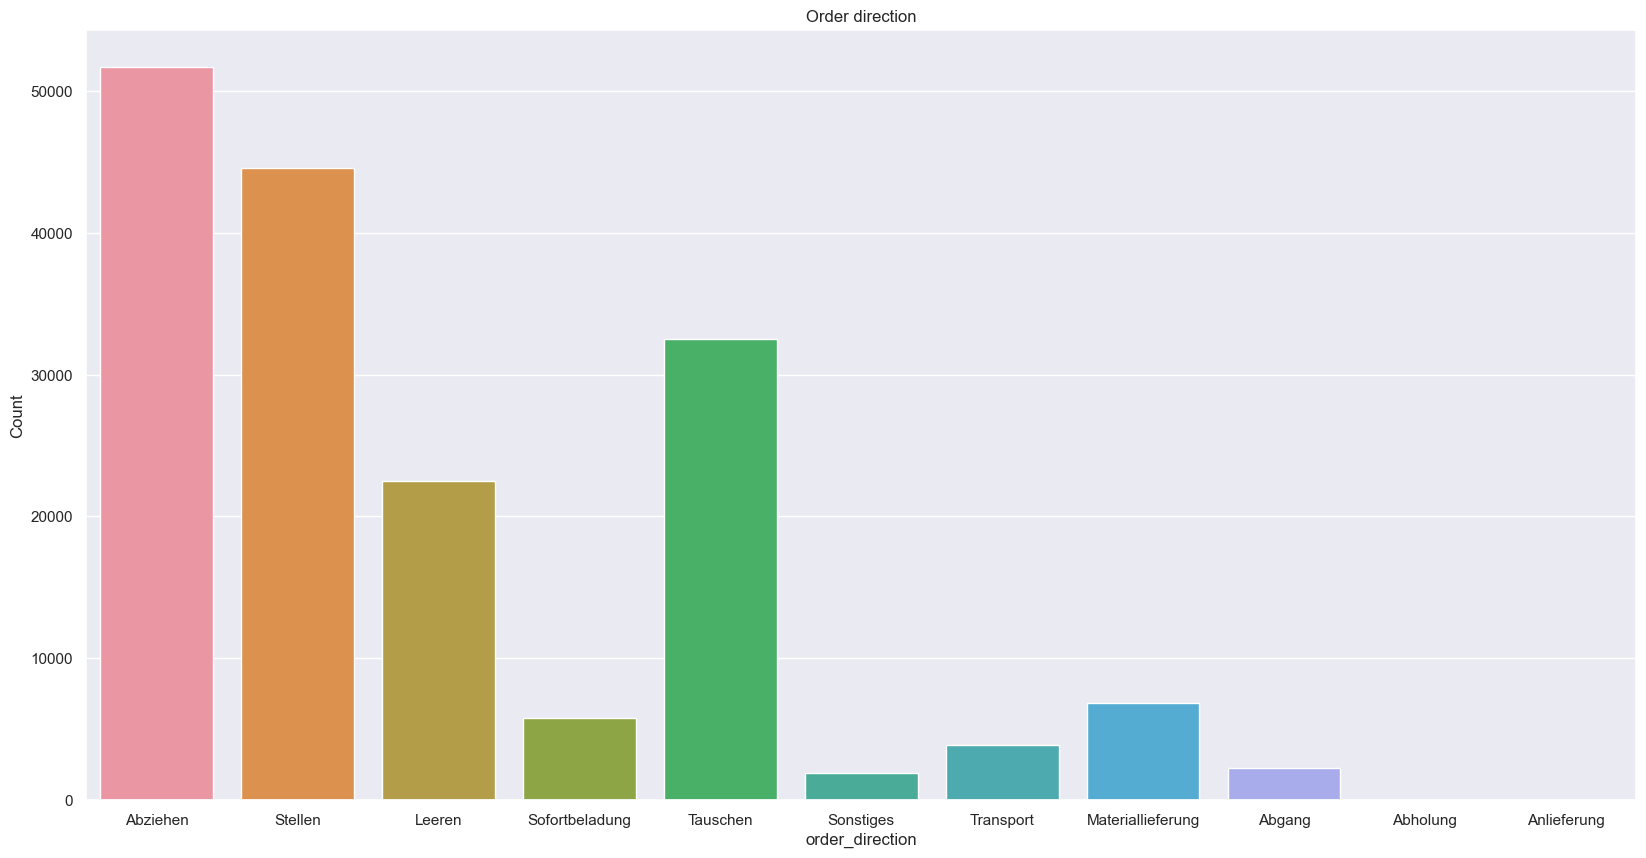

In [82]:
#Define plot object, setting figure size and colouring scheme
sns.set_theme(palette="Set3")
sns.set(rc={'figure.figsize':(20,10)})
count = sns.countplot( x = df['order_direction'])
#Setting graph title
count.set_title('Order direction')
count.set(xlabel = 'order_direction', ylabel = 'Count')
plt.xticks(rotation=0)
#Showing the plot
plt.show()

In [83]:
print(df.order_direction.value_counts())

Abziehen             51730
Stellen              44555
Tauschen             32516
Leeren               22500
Materiallieferung     6862
Sofortbeladung        5792
Transport             3845
Abgang                2255
Sonstiges             1919
Anlieferung              4
Abholung                 2
Name: order_direction, dtype: Int64


In [84]:
df.head(550)

,delivery_date,client_name,order_direction,container_name,material_name,material_avv
0,2020-11-20T08:37:23.514Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,Holz,<NA>
1,2020-11-20T08:43:34.536Z,Helmut Gaiser GmbH,Stellen,10 cbm Container,unbekannt,<NA>
2,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,unbekannt,<NA>
3,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,unbekannt,<NA>
4,2020-12-02T22:59:59.000Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,unbekannt,<NA>
...,...,...,...,...,...,...
545,2021-12-17T06:41:24.922Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,Abfall zur Verwertung,15 01 06
546,2022-03-22T07:54:58.992Z,Helmut Gaiser GmbH,Stellen,10 cbm Container,Abfall zur Verwertung,15 01 06
547,2022-03-22T11:00:39.089Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,Abfall zur Verwertung,15 01 06
548,2022-06-07T07:21:31.477Z,Helmut Gaiser GmbH,Abziehen,10 cbm Container,Abfall zur Verwertung,15 01 06


In [86]:
df.to_csv('inventory_forecasting_df1.csv', index=False, encoding='utf-8-sig')

######endddddddddddddddddddddddddddddddddddddd

In [87]:
df.shape

(171980, 6)